In [1]:
from flytekit.core.context_manager import FlyteContextManager

In [2]:
path = None

In [3]:
# Parameters
path = "/var/folders/jx/54tww2ls58n8qtlp9k31nbd80000gp/T/flyte-ytmvsbhm/raw/a0499d0fbc48ab90edf515f297d056ea"


In [4]:
from IPython.display import display
import pandas as pd
from PIL import Image

# Metrics Report

In [5]:
df = pd.read_parquet(path)
df["correct"] = ((df.prediction > 0.5) == df.label).astype(int)
df.sort_values(by="correct")[["label", "prediction", "description"]]

label  prediction                                        description
2    0.0    0.854929   This image is named img3.png and contains clouds
0    1.0    0.963508  This image is named img1.png and contains hydr...
1    1.0    0.960557  This image is named img2.png and contains hydr...

In [6]:
acc = df["correct"].sum() / len(df)
print(f"accuracy = {acc}")

accuracy = 0.6666666666666666


# False Positives

In [7]:
ctx = FlyteContextManager.current_context()

Image 2: This image is named img3.png and contains clouds


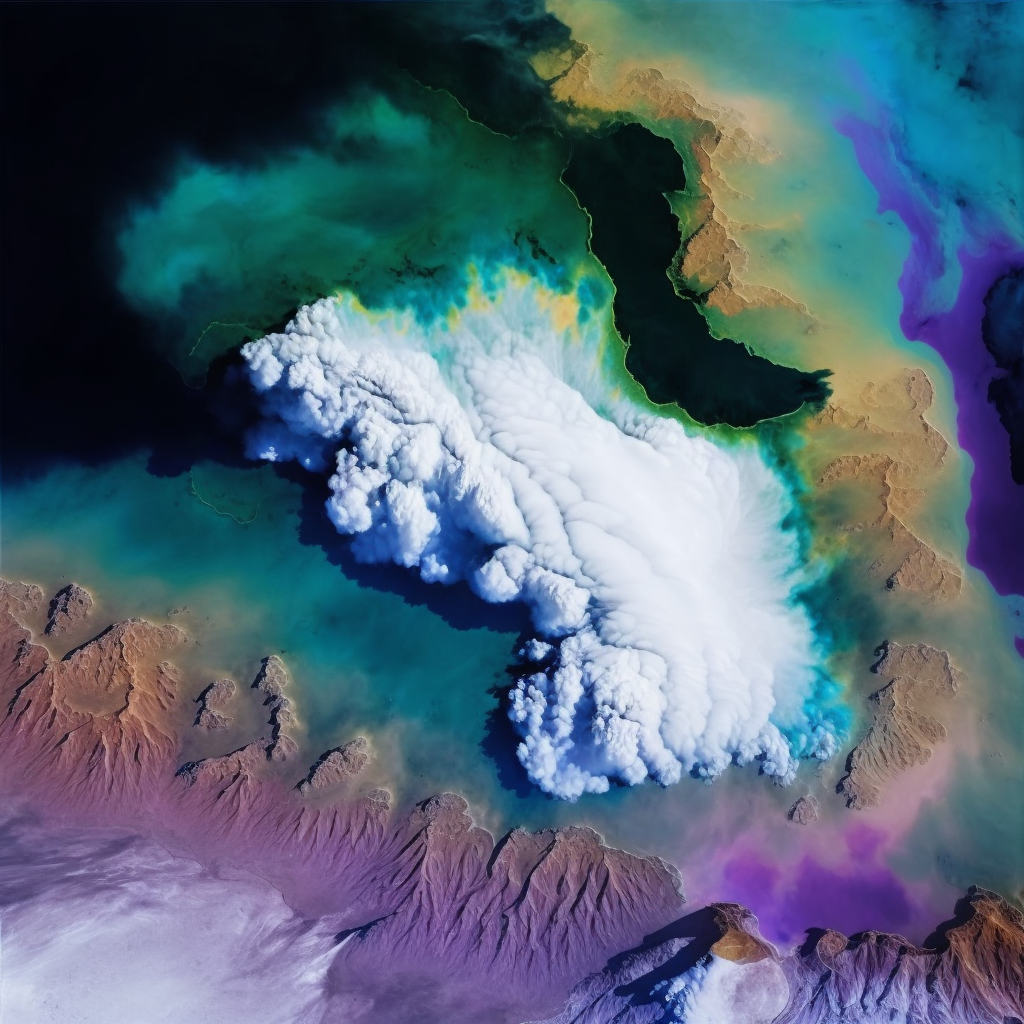

In [8]:
for i, img in df.iterrows():
    if (img.prediction > 0.5) == 1 and img.label == 0.0:
        print(f"Image {i}: {img.description}")
        local_img = ctx.file_access.get_random_local_path()
        ctx.file_access.get(img.remote_source, local_img)
        display(Image.open(local_img))

# True Positives & True Negatives

Image 0: This image is named img1.png and contains hydrocarbon plumes


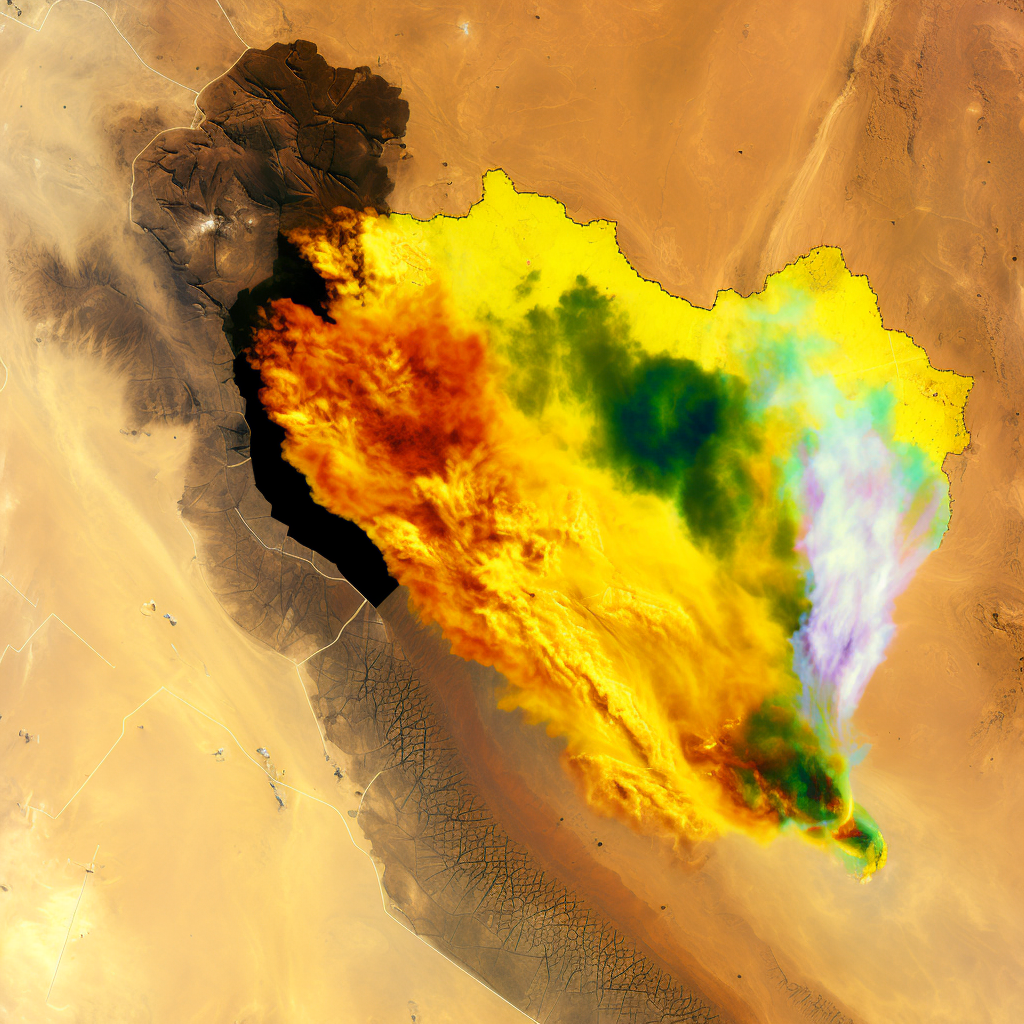

Image 1: This image is named img2.png and contains hydrocarbon plumes


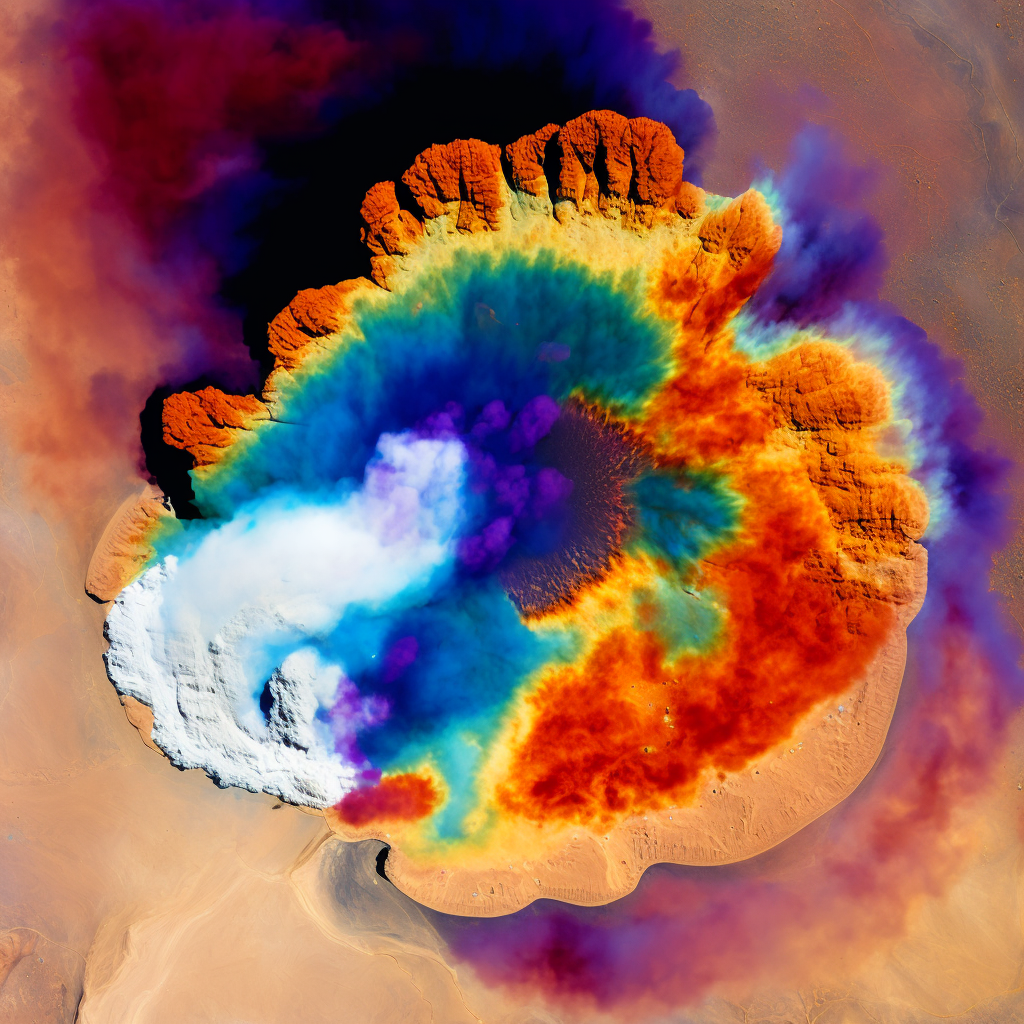

In [9]:
for i, img in df.iterrows():
    if (img.prediction > 0.5) == img.label:
        print(f"Image {i}: {img.description}")
        local_img = ctx.file_access.get_random_local_path()
        ctx.file_access.get(img.remote_source, local_img)
        display(Image.open(local_img))